# RNN Debug

The code is from the pytorch official example.

Unfortunately, it will encounter the problem of gradient explosion, so how can we solve this problem?



In [ ]:
import numpy as np
import torch
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
# Generate samples
np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float64')
torch.save(data, open('traindata.pt', 'wb'))

In [ ]:
# define a RNN model
class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input, future = 0):
        outputs = []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for input_t in input.split(1, dim=1):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        for i in range(future):# if we should predict the future
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        outputs = torch.cat(outputs, dim=1)
        return outputs

STEP:  0
loss: 0.5023738120466186
loss: 0.5003853899285351
loss: 0.48806367963236835
loss: 0.4663136999549464
loss: 0.4143535606096668
loss: 0.3636933821457328
loss: 0.2885522804343007
loss: 0.09832804986417264
loss: 0.03623768579379242
loss: 0.031173061339738482
loss: 0.02917666797715157
loss: 0.02775169987506509
loss: 0.026437688800700142
loss: 0.024914937244741545
loss: 0.02300271604962955
loss: 0.0206067276002825
loss: 0.01760759614159572
loss: 0.013354882642907209
loss: 0.009118702649933563
loss: 0.006670301809655342
test loss: 0.004917412894512649


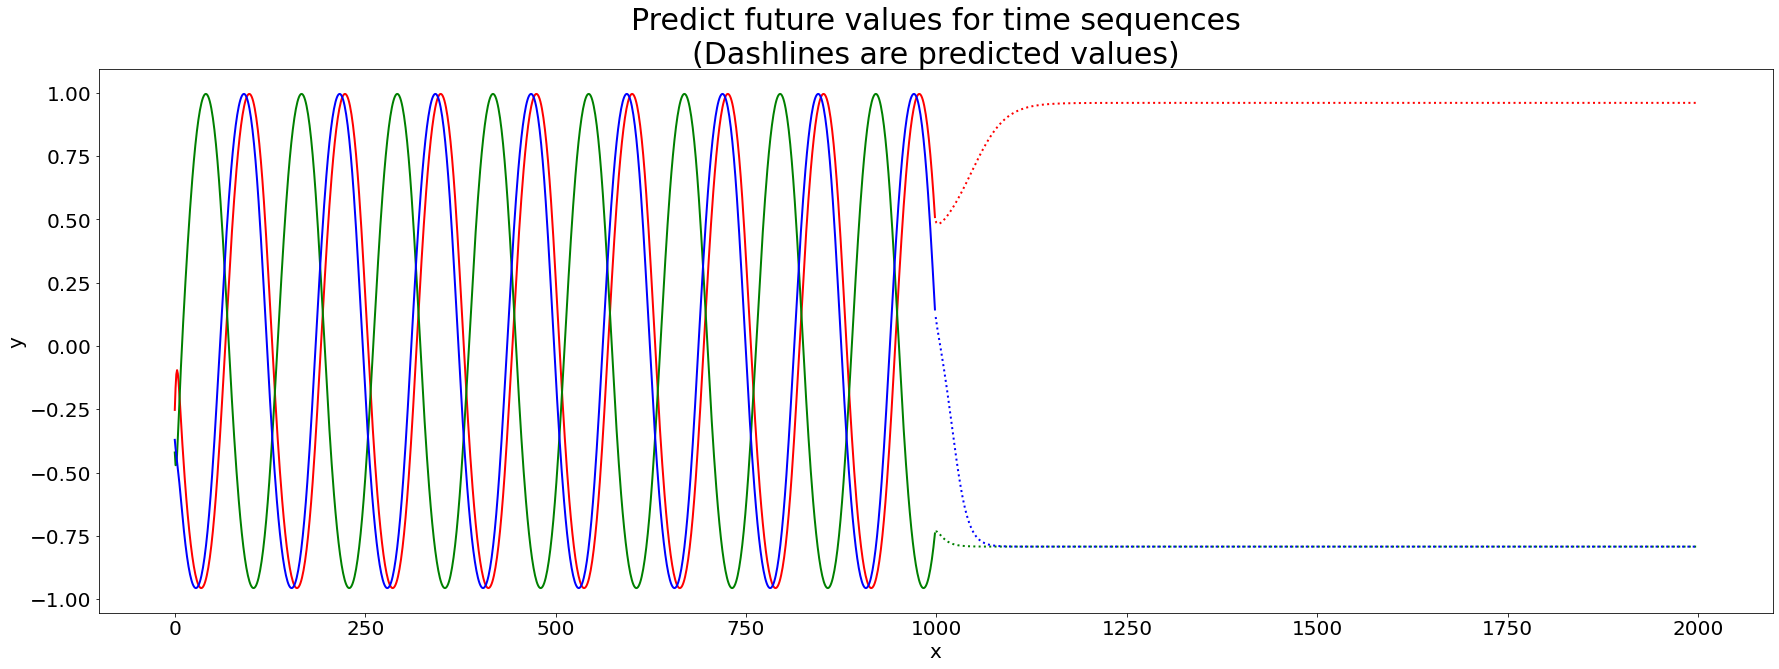

STEP:  1
loss: 0.005209208199484858
loss: 0.003728429103636911
loss: 0.003455348384587262
loss: 0.002294655958815892
loss: 0.0016255428972432964
loss: 0.0013353028582369735
loss: 0.0011835770119616043
loss: 0.0010522294492630307
loss: 0.0009190857165884473
loss: 0.0007945703608924166
loss: 0.0007126161762014127
loss: 0.0006632334643340521
loss: 0.000647394688251107
loss: 0.0006366698110518253
loss: 0.0006294809261040861
loss: 0.0006231540571743874
loss: 0.0006143863965487236
loss: 0.0005996812125404995
loss: 0.0005761213722139514
loss: 0.0005414458134049302
test loss: 0.00034387476533997405


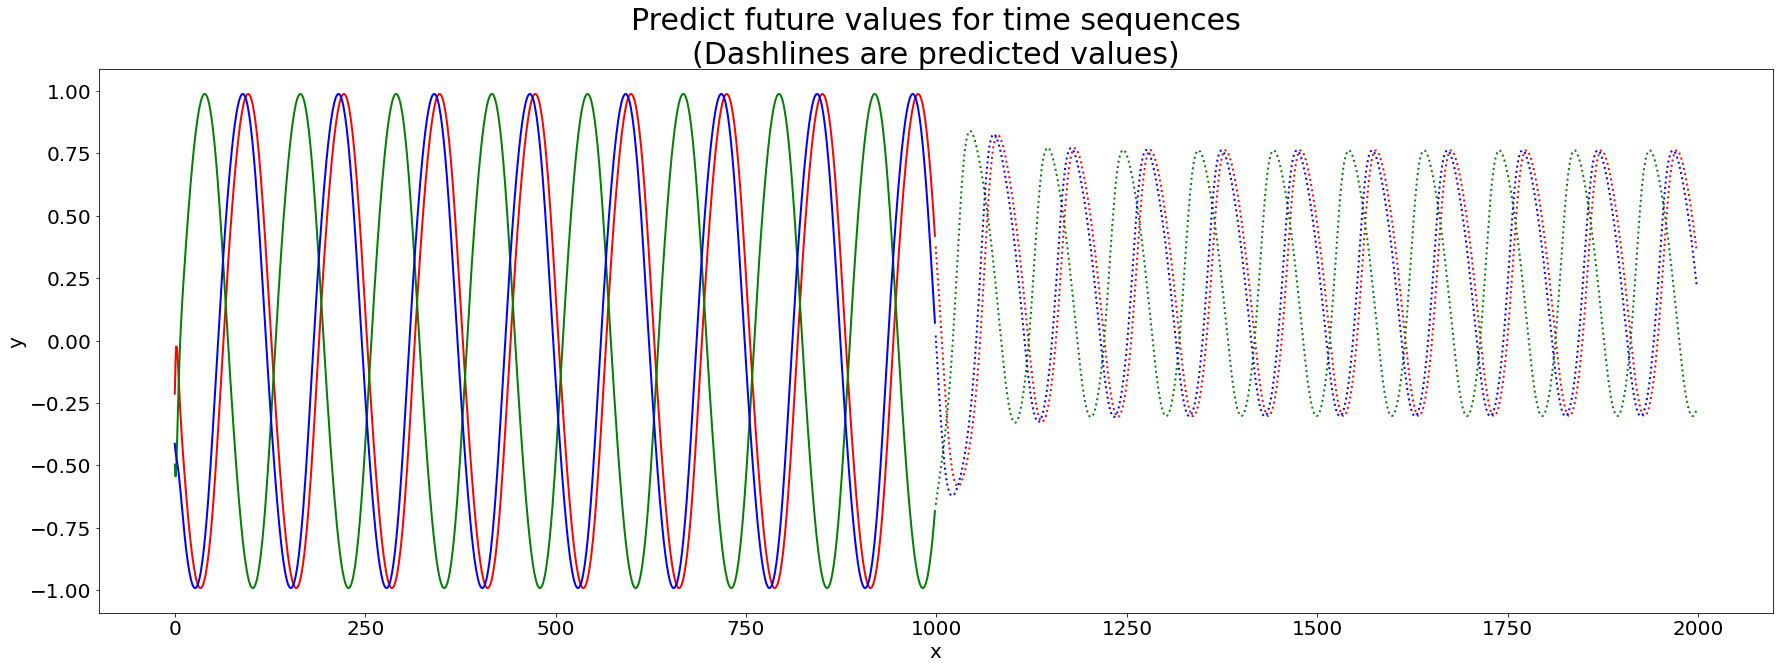

STEP:  2
loss: 0.0004949640919935497
loss: 0.0004382486736469672
loss: 0.0003749307323790152
loss: 0.0003198937384480586
loss: 0.00028128440851597834
loss: 0.00025707164708733786
loss: 0.00024336164011315849
loss: 0.00023609502321939068
loss: 0.00023246622165402979
loss: 0.00023068216108048086
loss: 0.00022941642561132518
loss: 0.0002283141106744335
loss: 0.0002271765829388493
loss: 0.000225758924365429
loss: 0.0002238516930578587
loss: 0.00022087522640136043
loss: 0.0002160323848437881
loss: 0.00020787116015516958
loss: 0.00019718448871575787
loss: 0.00018614925970675958
test loss: 5.203203033945914e-05


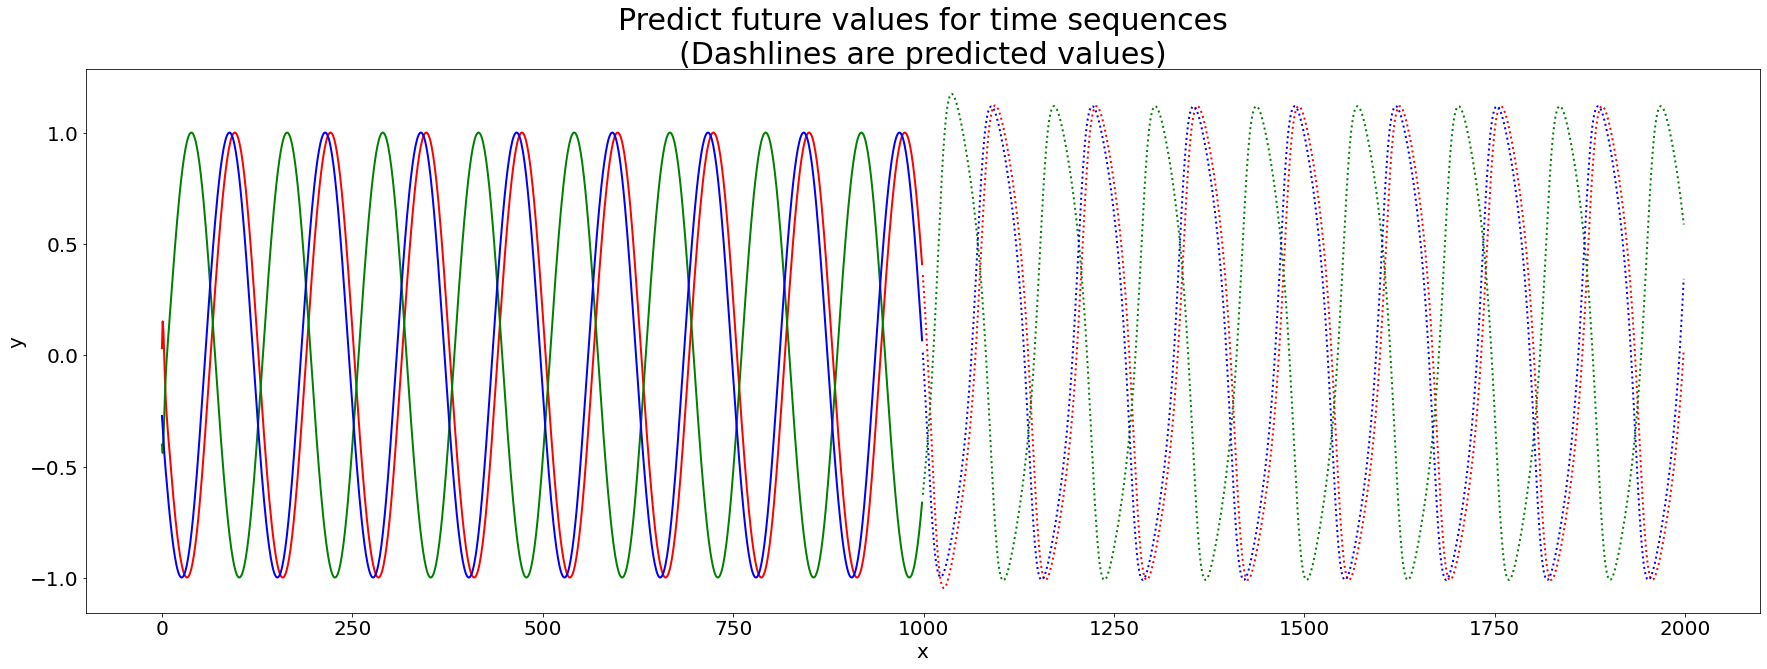

STEP:  3
loss: 0.00017560836555713573
loss: 0.00016681682227962815
loss: 0.00016022428267774893
loss: 0.00015562019655058397
loss: 0.00015378442675831845
loss: 0.00015276387503536344
loss: 0.00015201481944606372
loss: 0.0001513764963749416
loss: 0.0001508432301255736
loss: 0.0001503557641985817
loss: 0.00014979033606020596
loss: 0.00014896061766189535
loss: 0.00014751404912540195
loss: 0.0001454600804132276
loss: 0.00014318098338373877
loss: 0.00014038697613712742
loss: 0.000137078006202141
loss: 0.00013258507652862464
loss: 0.00012742496481910225
loss: 0.00012209816121744015
test loss: 4.1584863843751915e-05


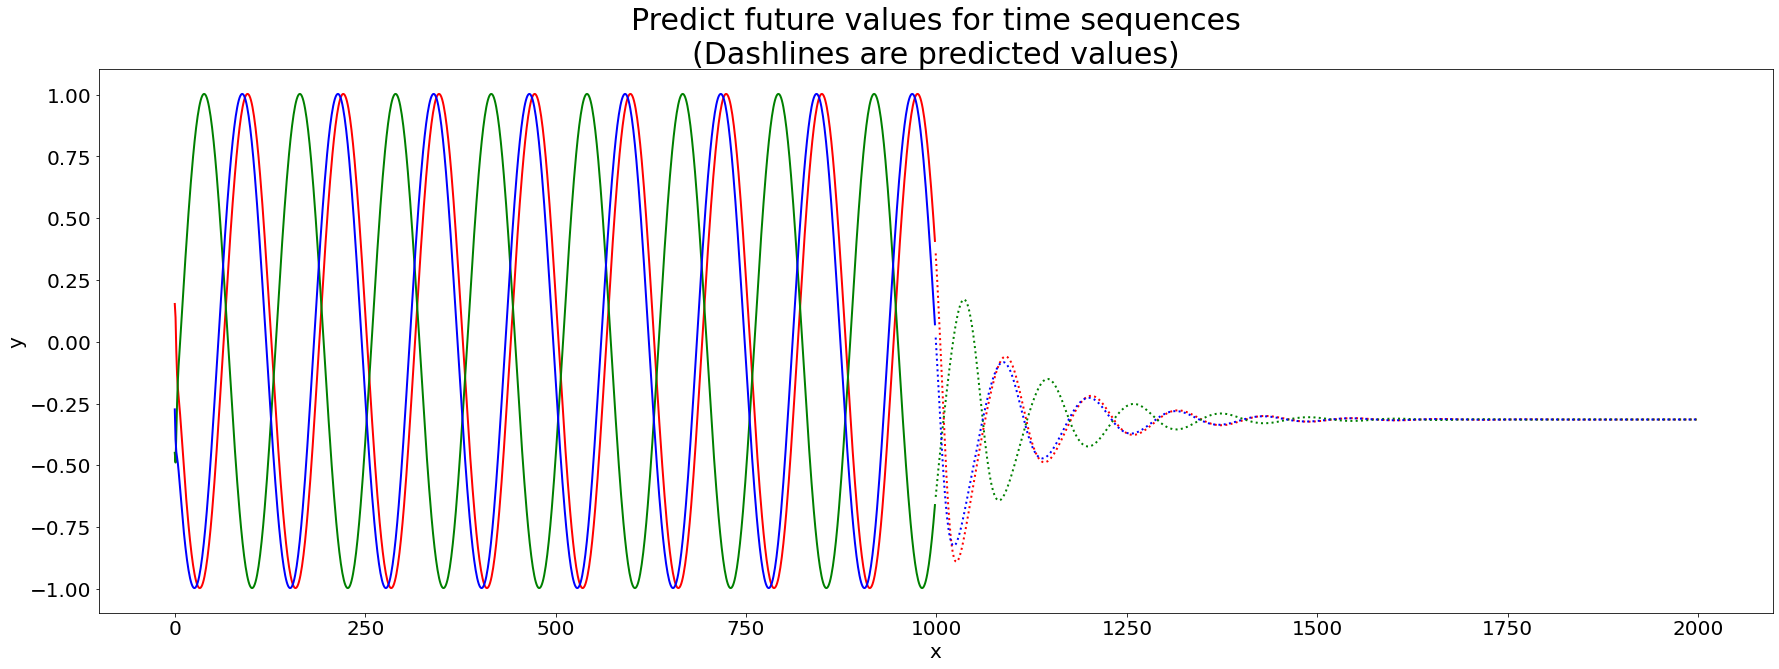

STEP:  4
loss: 0.00011743139891611575
loss: 0.00011364996856731973
loss: 0.00011012429910329196
loss: 0.00010631948697251125
loss: 0.00010117781072318429
loss: 9.52841036464372e-05
loss: 8.833489362274374e-05
loss: 8.365034779725026e-05
loss: 8.11352778549855e-05
loss: 7.951300607696212e-05
loss: 7.826709611417489e-05
loss: 7.773274055096314e-05
loss: 7.721639979500545e-05
loss: 7.574208154510963e-05
loss: 7.230135433596324e-05
loss: 6.769127793287486e-05
loss: 6.038733087232136e-05
loss: 5.3739565205382586e-05
loss: 4.896478989467328e-05
loss: 4.5684533556582026e-05
test loss: 2.8393953407657677e-05


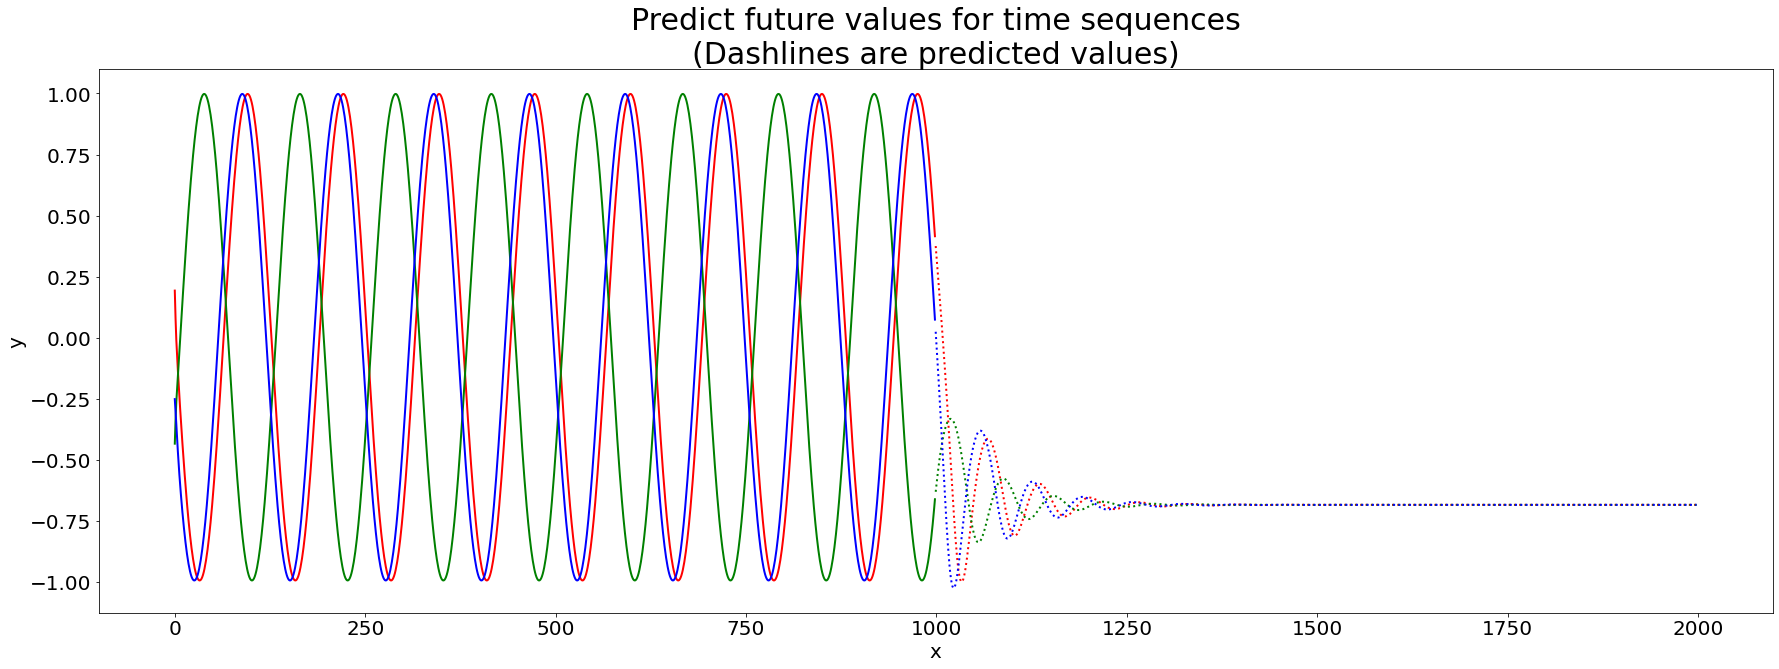

STEP:  5
loss: 4.210376833646721e-05
loss: 4.0421966155932444e-05
loss: 3.8474908385046035e-05
loss: 3.637422394980962e-05
loss: 3.4277422192329834e-05
loss: 3.222756089576465e-05
loss: 3.0262849948135015e-05
loss: 2.8394883004997073e-05
loss: 2.6868810603619033e-05
loss: 2.5598175964399787e-05
loss: 2.4785866634928463e-05
loss: 2.4243719751436234e-05
loss: 2.3613759757694104e-05
loss: 2.295450569501773e-05
loss: 2.239651072847572e-05
loss: 2.191405275589435e-05
loss: 2.146764815563345e-05
loss: 2.0982564904866252e-05
loss: 2.0417854859292327e-05
loss: 1.9750728925831403e-05
test loss: 1.8308548787806883e-05


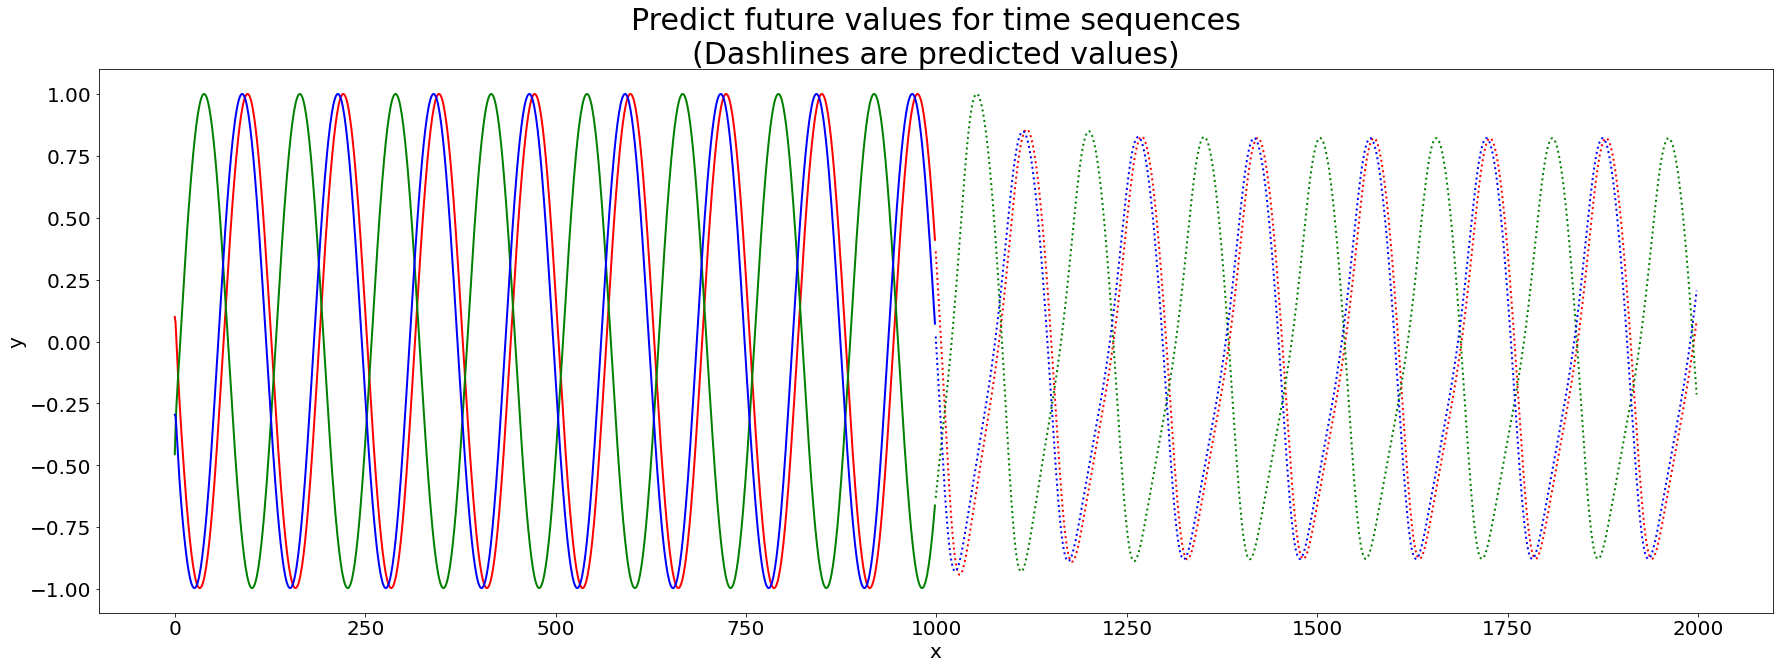

STEP:  6
loss: 1.8989053935302046e-05
loss: 1.8138964555291763e-05
loss: 1.7037966651696188e-05
loss: 1.5954475437064836e-05
loss: 1.542562325364245e-05
loss: 1.495972706534136e-05
loss: 1.468011502837597e-05
loss: 1.4531986370386951e-05
loss: 1.4462048230118744e-05
loss: 1.4419217845472442e-05
loss: 1.4386733826614655e-05
loss: 1.430145342764672e-05
loss: 1.4004752273425478e-05
loss: 1.3658611899076796e-05
loss: 1.328104047920394e-05
loss: 1.2868834112982219e-05
loss: 1.2411613111297338e-05
loss: 1.1961632964659808e-05
loss: 1.1438821618241649e-05
loss: 1.1185457926491347e-05
test loss: 1.4007088818724776e-05


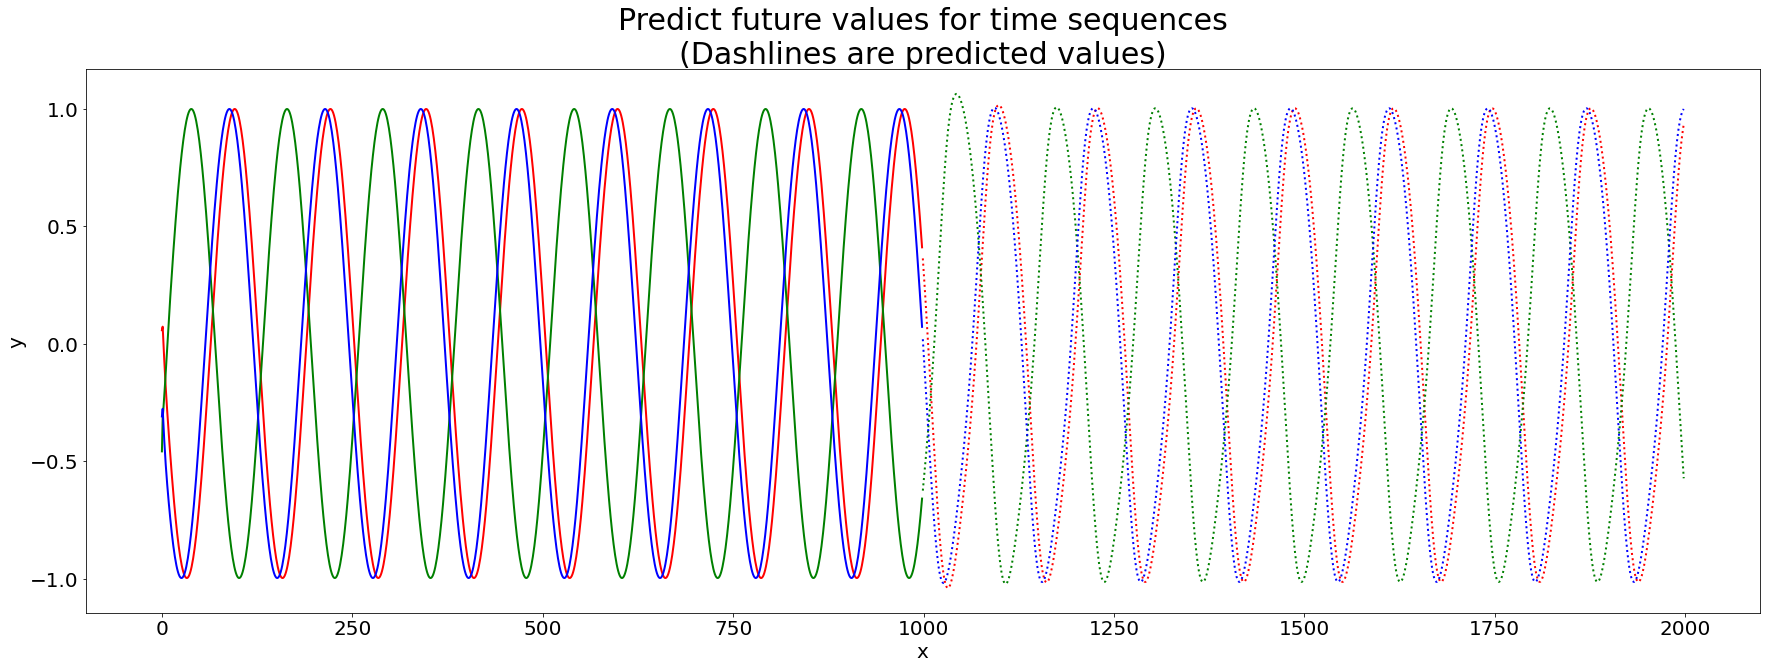

STEP:  7
loss: 1.039913090761211e-05
loss: 9.634131829034166e-06
loss: 9.254268795327623e-06
loss: 9.156917728509487e-06
loss: 9.10754421365888e-06
loss: 9.085107474006766e-06
loss: 9.06836527336279e-06
loss: 9.055426682786289e-06
loss: 9.044428200868853e-06
loss: 9.033966718843674e-06
loss: 9.022401526310311e-06
loss: 9.00747231025466e-06
loss: 8.986012922267882e-06
loss: 8.95279869771148e-06
loss: 8.899034568581708e-06
loss: 8.809551490241201e-06
loss: 8.657409143456176e-06
loss: 8.387697993707383e-06
loss: 8.054099261358435e-06
loss: 7.751214573789737e-06
test loss: 9.69133081842519e-06


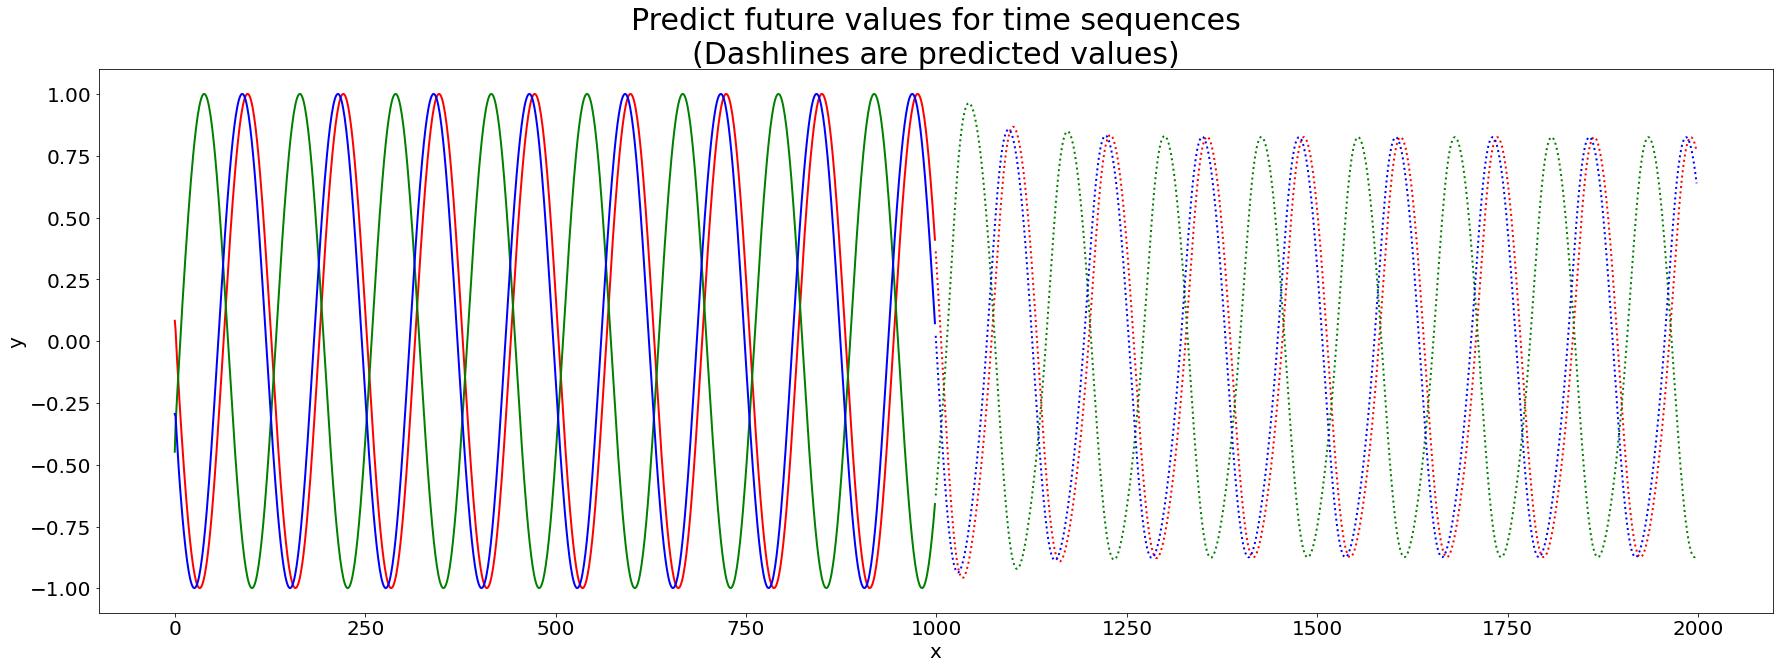

STEP:  8
loss: 7.267899223490588e-06
loss: 6.84333617931814e-06
loss: 6.3672939853399e-06
loss: 6.223942322180714e-06
loss: 6.126225238171589e-06
loss: 6.076184405647956e-06
loss: 6.0527423836968555e-06
loss: 6.03425796944604e-06
loss: 6.015536956017978e-06
loss: 5.993474682396928e-06
loss: 5.970900169354917e-06
loss: 5.954370927441803e-06
loss: 5.942356581700891e-06
loss: 5.932338147287897e-06
loss: 5.92145499778908e-06
loss: 5.906818391308537e-06
loss: 5.885459663535541e-06
loss: 5.857627706243665e-06
loss: 5.826676637591046e-06
loss: 5.792486845688923e-06
test loss: 8.164856806592472e-06


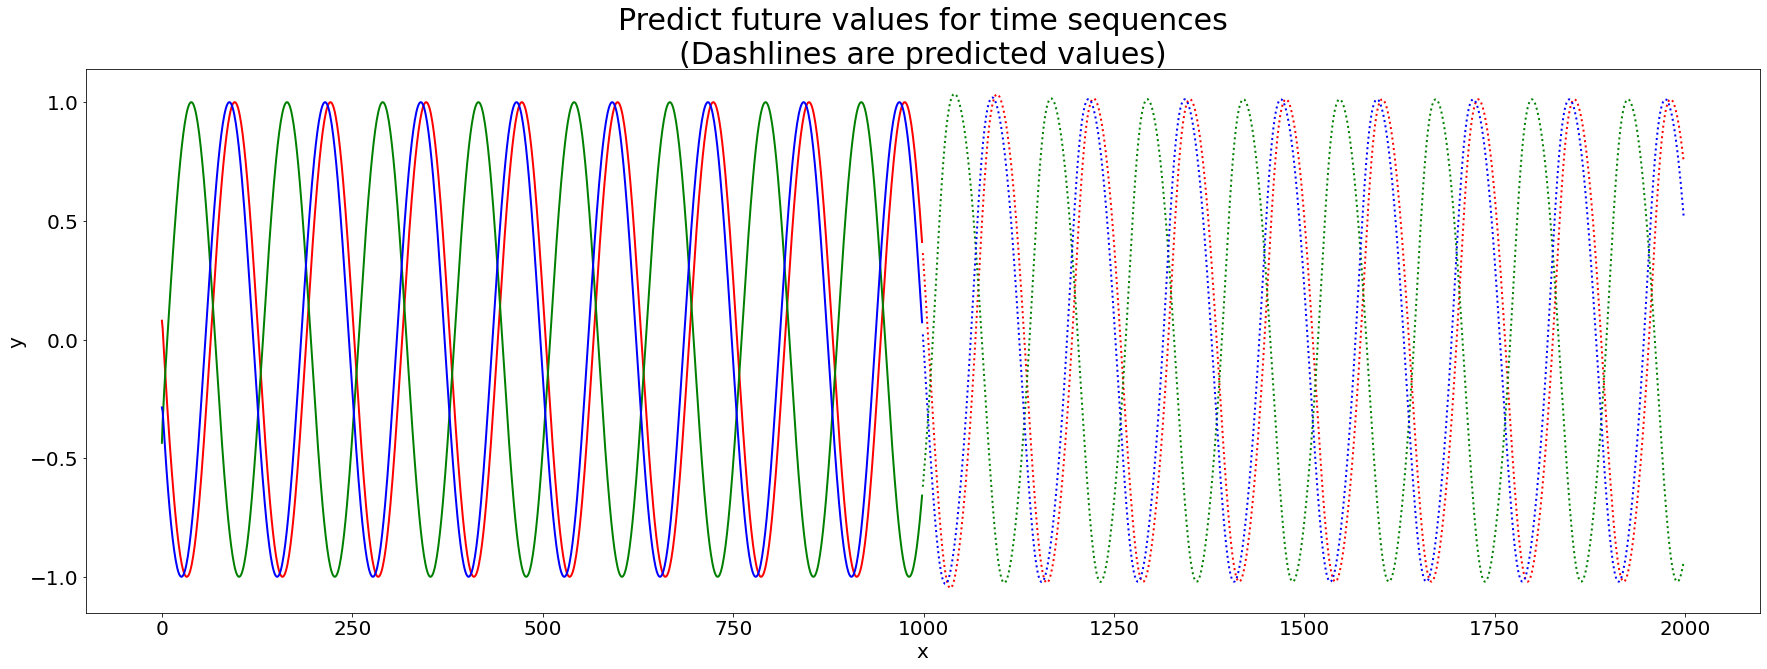

STEP:  9
loss: 5.762873311269472e-06
loss: 5.738556777086659e-06
loss: 5.719176367275501e-06
loss: 5.700654577970356e-06
loss: 5.6784582319436546e-06
loss: 5.64207442247187e-06
loss: 5.612571092648779e-06
loss: 5.547345463462316e-06
loss: 5.459540381421472e-06
loss: 5.385287925414362e-06
loss: 5.333303791381229e-06
loss: 5.303871917858623e-06
loss: 5.2892278362432e-06
loss: 5.281918757217526e-06
loss: 5.278198960983527e-06
loss: 5.272447128678016e-06
loss: 5.258683938529044e-06
loss: 5.23378220281021e-06
loss: 5.190439166077747e-06
loss: 5.118176263746056e-06
test loss: 6.78390589217727e-06


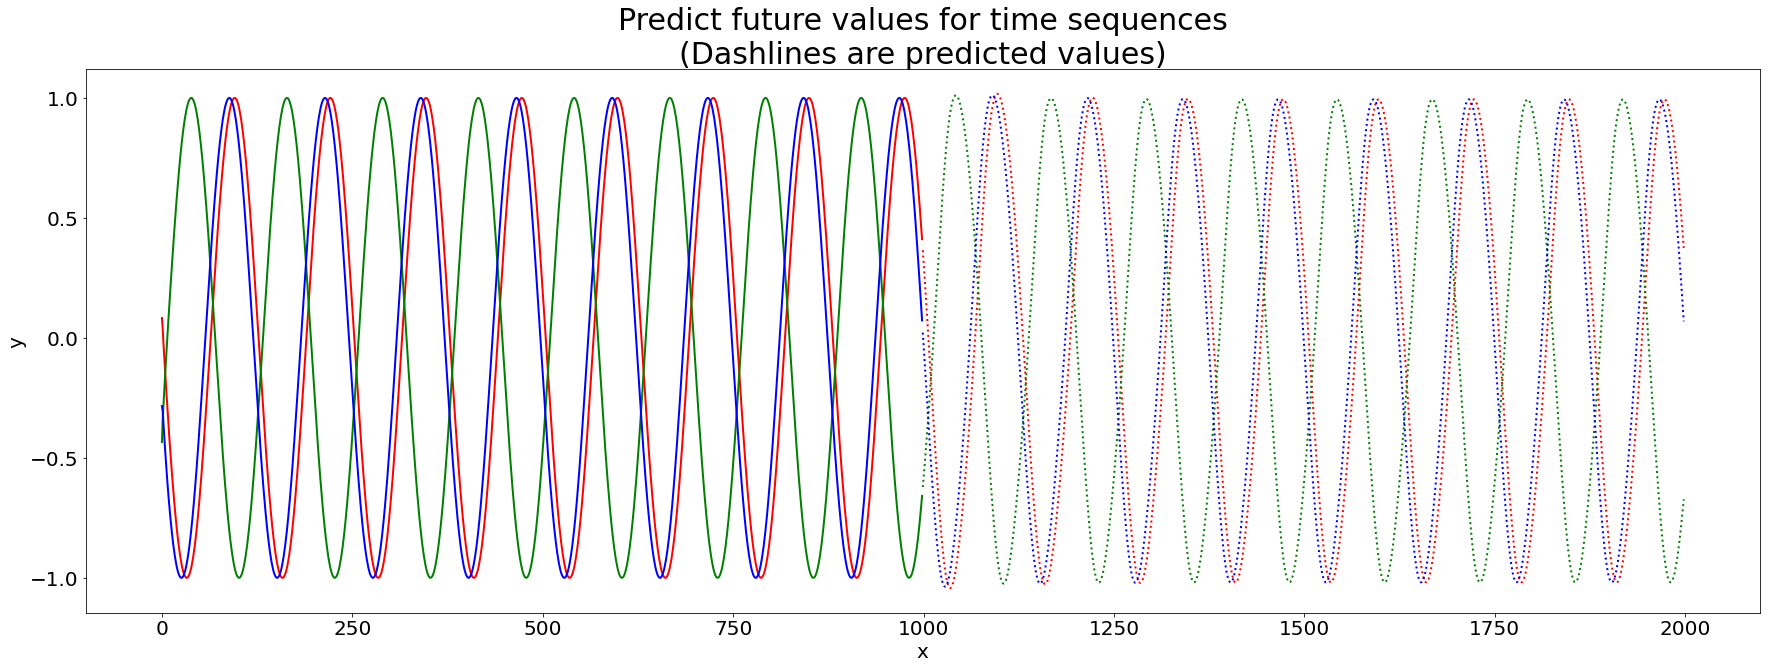

STEP:  10
loss: 5.001274763705105e-06
loss: 4.847982931233086e-06
loss: 4.611315106686367e-06
loss: 4.496828194005935e-06
loss: 4.376061038334788e-06
loss: 4.211774224122606e-06
loss: 4.07949549751453e-06
loss: 3.9975538945525606e-06
loss: 3.90723612673345e-06
loss: 3.837110066412491e-06
loss: 3.7715557078671843e-06
loss: 3.726181053682885e-06
loss: 3.6840798727771894e-06
loss: 3.6394848717942597e-06
loss: 3.607233551659774e-06
loss: 3.585073127095086e-06
loss: 3.573911600833228e-06
loss: 3.5626689619073482e-06
loss: 3.5567873794960407e-06
loss: 3.5531148675423626e-06
test loss: 5.652351803332948e-06


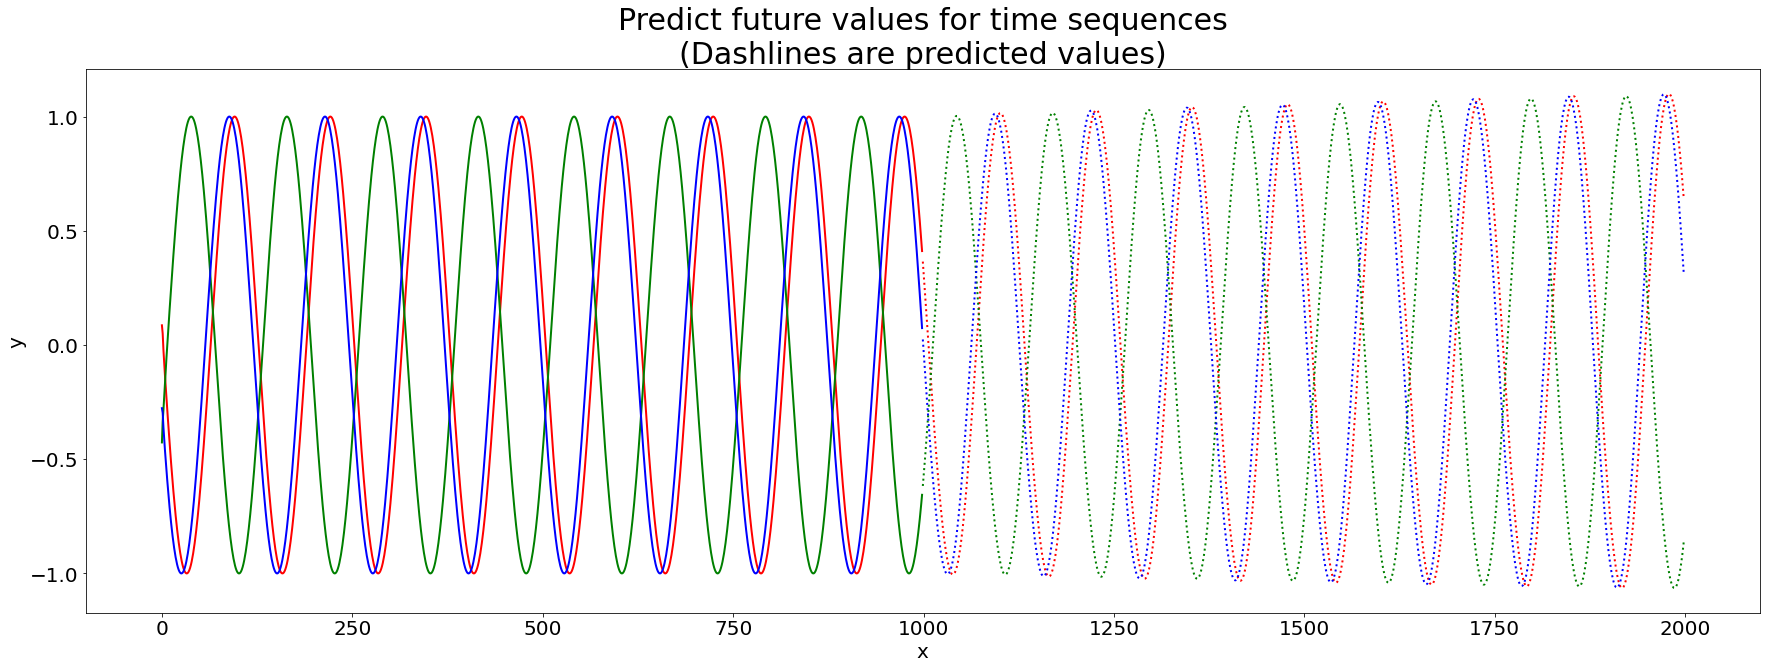

STEP:  11
loss: 3.550561574087173e-06
loss: 3.548748161007316e-06
loss: 3.5474802843457177e-06
loss: 3.546599999434698e-06
test loss: 5.649046508227258e-06


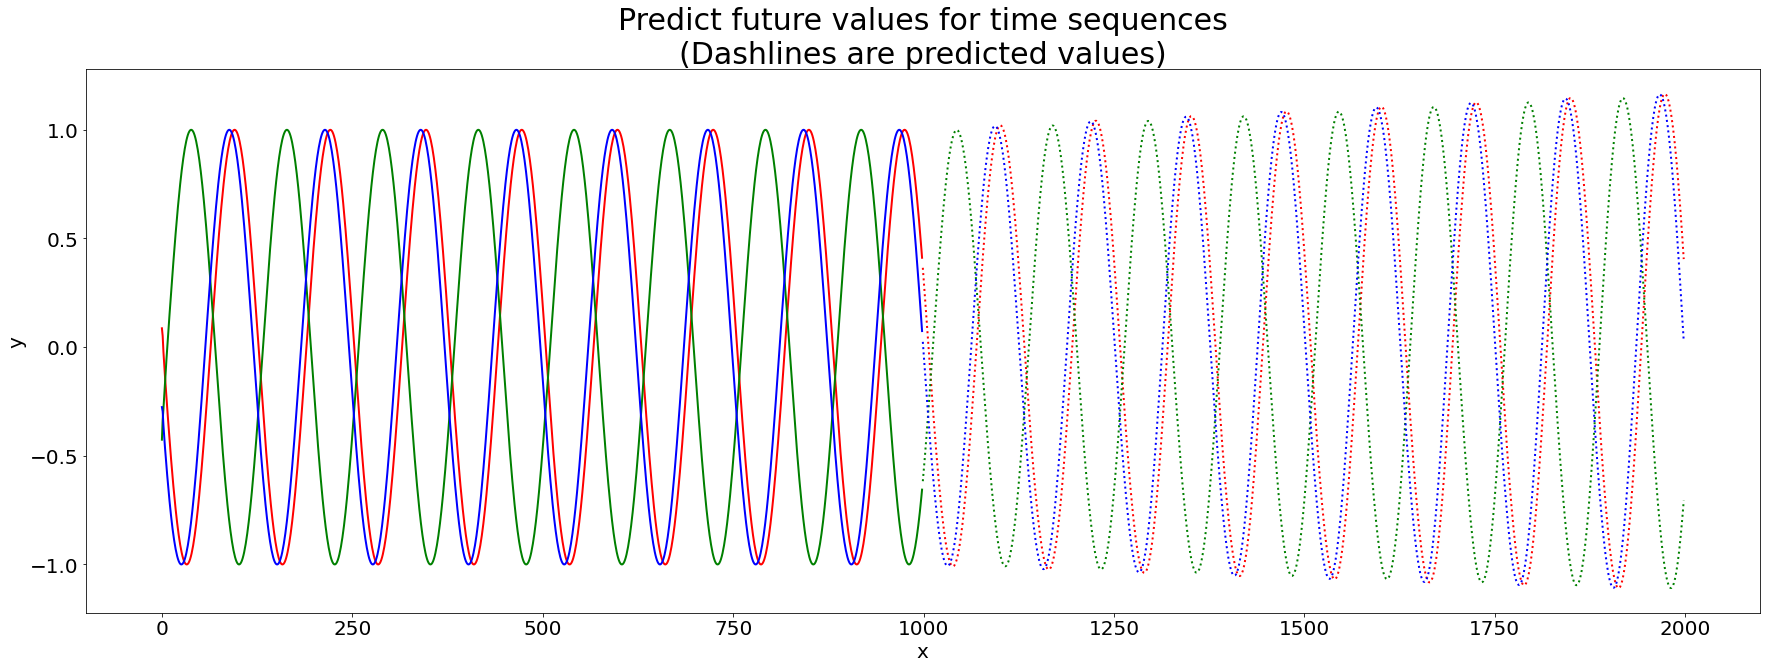

STEP:  12
loss: 3.546599999434698e-06
loss: 3.545997624377441e-06
test loss: 5.649903503116759e-06


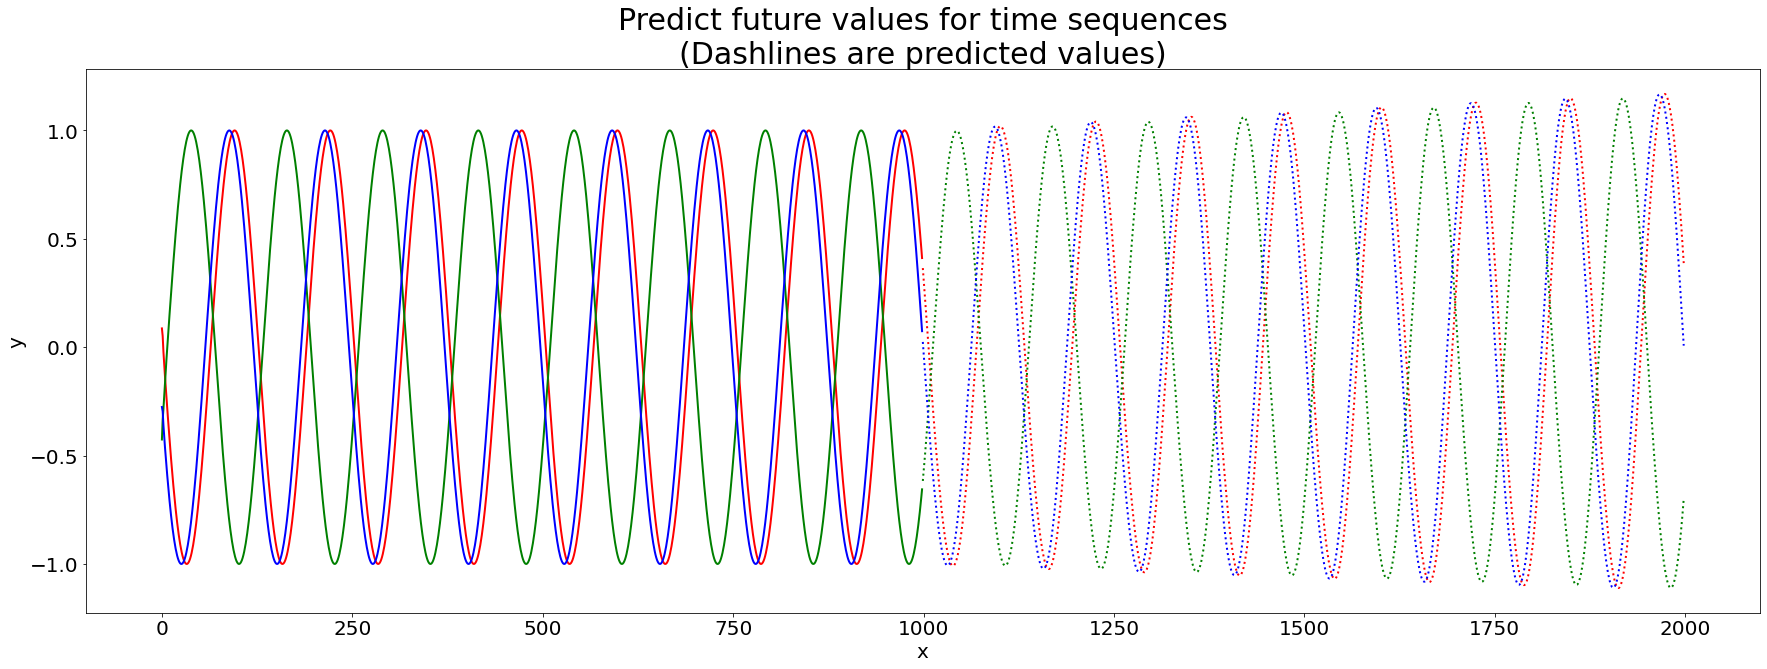

STEP:  13
loss: 3.545997624377441e-06
loss: 3.5455154060320157e-06
test loss: 5.650355109605986e-06


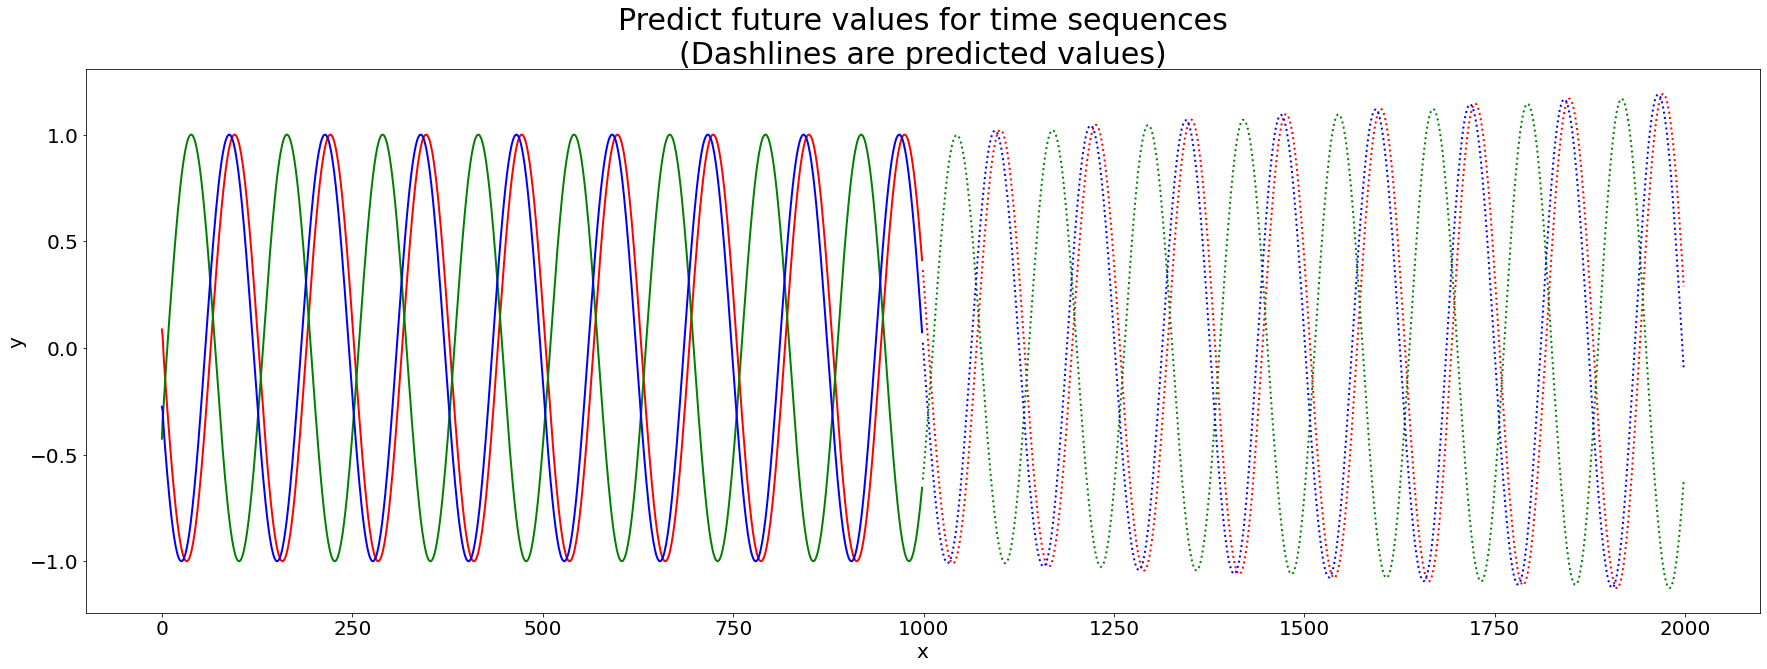

STEP:  14
loss: 3.5455154060320157e-06
loss: 3.5451751039234903e-06
test loss: 5.650963457180791e-06


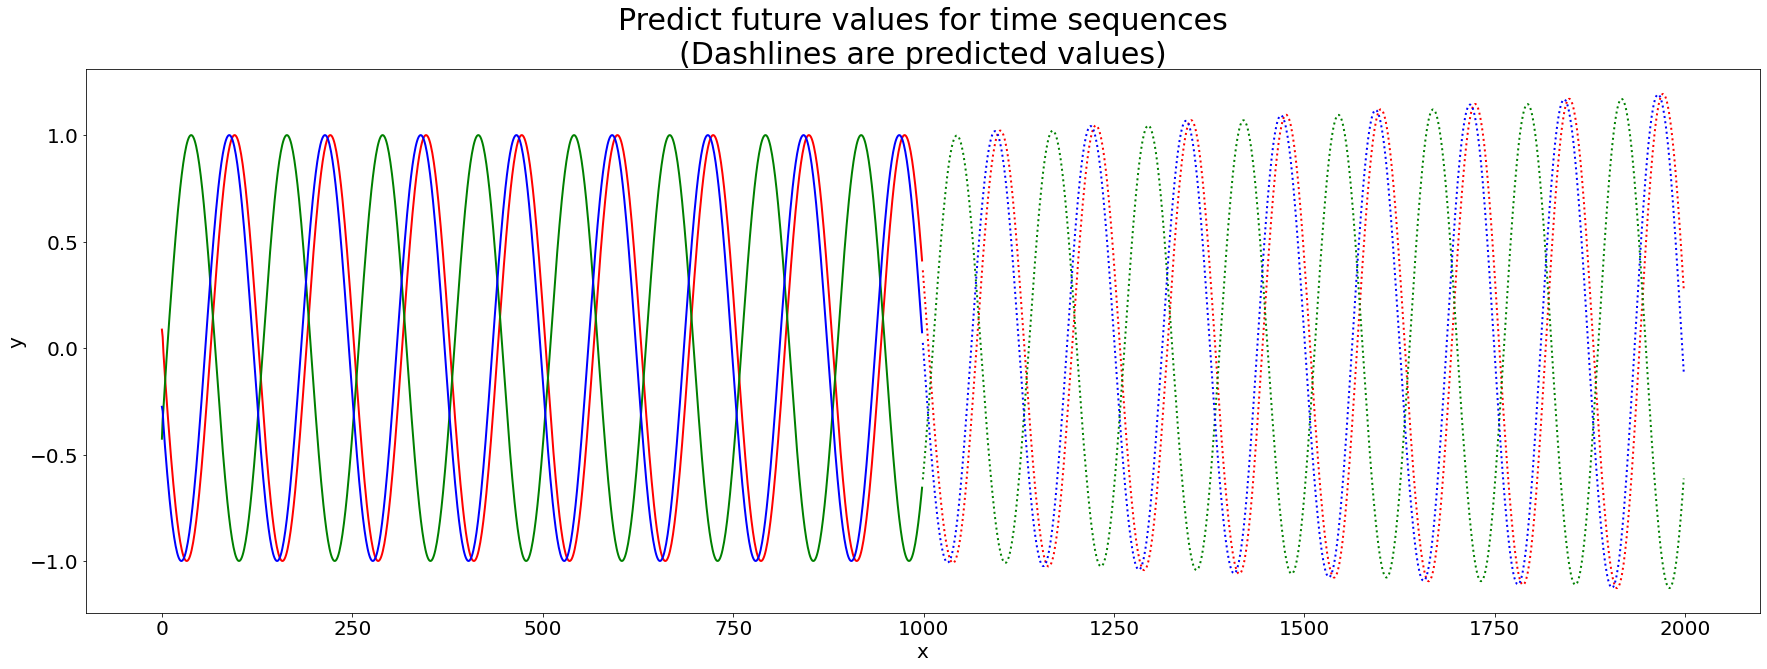

In [ ]:
steps = 15
# set random seed to 0
np.random.seed(0)
torch.manual_seed(0)
# load data and make training set
data = torch.load('traindata.pt')
input = torch.from_numpy(data[3:, :-1])
target = torch.from_numpy(data[3:, 1:])
test_input = torch.from_numpy(data[:3, :-1])
test_target = torch.from_numpy(data[:3, 1:])
# build the model
seq = Sequence()
seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.4)
#begin to train
for i in range(steps):
    print('STEP: ', i)
    def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('loss:', loss.item())
        loss.backward()
        return loss
    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        future = 1000
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.item())
        y = pred.detach().numpy()
    # draw the result
    plt.figure(figsize=(30,10))
    plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    def draw(yi, color):
        plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
        plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
    draw(y[0], 'r')
    draw(y[1], 'g')
    draw(y[2], 'b')
    plt.show()
    plt.savefig('predict%d.png'%i)
    plt.close()